# Project on Crimes against women using Python Libraries

### Project Scope: The scope of the project is to analyze the trends,patterns in the past 20 years relating the crimes against women happening in India, generate insights using numpy and pandas and to visualize it via matplotlib and seaborn


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlp

In [2]:
data = pd.read_csv(r'C:\Users\USER\Desktop\project\CrimesOnWomenData.csv')

### PreProcessing

In [3]:
data.head()

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [4]:
column_names={"K&A":"Kidnap&Assault",
              "DD":"Dowry_Deaths",
              "AoW":"Assault_against_women",
              "AoM":"Assault_against_modesty_of_women",
              "DV":"Domestic_Violence",
              "WT":"Women_Trafficking"}
data.rename(columns=column_names,inplace=True)

data=data.drop(data.columns[0],axis=1)

data['Total_crimes'] = data.iloc[:,2:].sum(axis=1)

data = data.applymap(lambda x: x.lower() if isinstance(x, str) else x)
data.head()

,State,Year,Rape,Kidnap&Assault,Dowry_Deaths,Assault_against_women,Assault_against_modesty_of_women,Domestic_Violence,Women_Trafficking,Total_crimes
0,andhra pradesh,2001,871,765,420,3544,2271,5791,7,13669
1,arunachal pradesh,2001,33,55,0,78,3,11,0,180
2,assam,2001,817,1070,59,850,4,1248,0,4048
3,bihar,2001,888,518,859,562,21,1558,83,4489
4,chhattisgarh,2001,959,171,70,1763,161,840,0,3964


In [5]:
#data.info()

In [6]:
#data.isnull().sum()

In [7]:
#data.describe()

### Data Analysis using Pandas

In [8]:
crimes_per_year = data.groupby('Year')['Total_crimes'].sum()
crimes_per_year

Year
2001    128537
2002    128972
2003    128142
2004    140072
2005    139333
2006    149742
2007    170196
2008    182757
2009    190617
2010    200534
2011    178529
2012    235025
2013    298444
2014    333216
2015    323852
2016    335769
2017    305897
2018    314093
2019    333717
2020    302186
2021    348092
Name: Total_crimes, dtype: int64

In [9]:
crimes_by_state = data.groupby('State')['Total_crimes'].sum()
top_states = crimes_by_state.sort_values(ascending=False).head(10)
top_states

State
uttar pradesh     529734
madhya pradesh    413157
west bengal       409242
andhra pradesh    391123
rajasthan         379264
maharashtra       365632
assam             291980
kerala            202986
odisha            194774
bihar             189886
Name: Total_crimes, dtype: int64

In [10]:
category_analysis = data.iloc[:,2:9].sum()
category_analysis.sort_values(ascending=False,inplace=True)
category_analysis

Domestic_Violence                   1909978
Assault_against_women               1162229
Kidnap&Assault                       835023
Rape                                 535702
Assault_against_modesty_of_women     244884
Dowry_Deaths                         158750
Women_Trafficking                     21156
dtype: int64

### Statiscal Analysis using Numpy

In [11]:
growth_rate = np.diff(crimes_per_year) / crimes_per_year[:-1] * 100
print(growth_rate)

Year
2001     0.338424
2002    -0.643551
2003     9.309984
2004    -0.527586
2005     7.470592
2006    13.659494
2007     7.380314
2008     4.300793
2009     5.202579
2010   -10.973202
2011    31.645279
2012    26.983938
2013    11.651097
2014    -2.810189
2015     3.679767
2016    -8.896593
2017     2.679333
2018     6.247831
2019    -9.448425
2020    15.191306
Name: Total_crimes, dtype: float64


### Visualization using Matplotlib and Seaborn

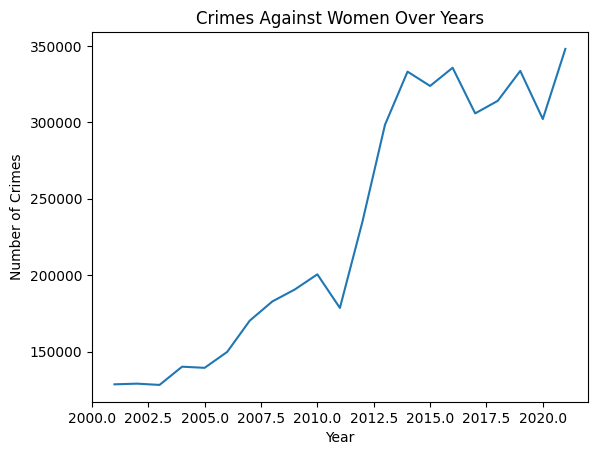

In [12]:
import matplotlib.pyplot as plt

crimes_per_year.plot(kind='line')
plt.title('Crimes Against Women Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

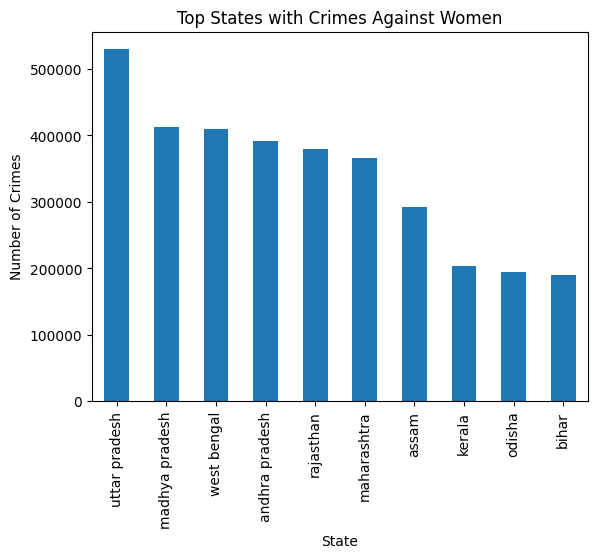

In [13]:
top_states.plot(kind='bar')
plt.title('Top States with Crimes Against Women')
plt.xlabel('State')
plt.ylabel('Number of Crimes')
plt.show()

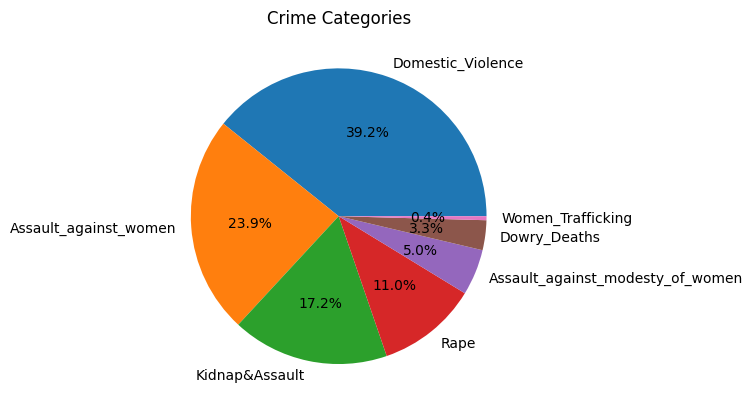

In [14]:
category_analysis.plot(kind='pie', autopct='%1.1f%%')
plt.title('Crime Categories')
plt.show()

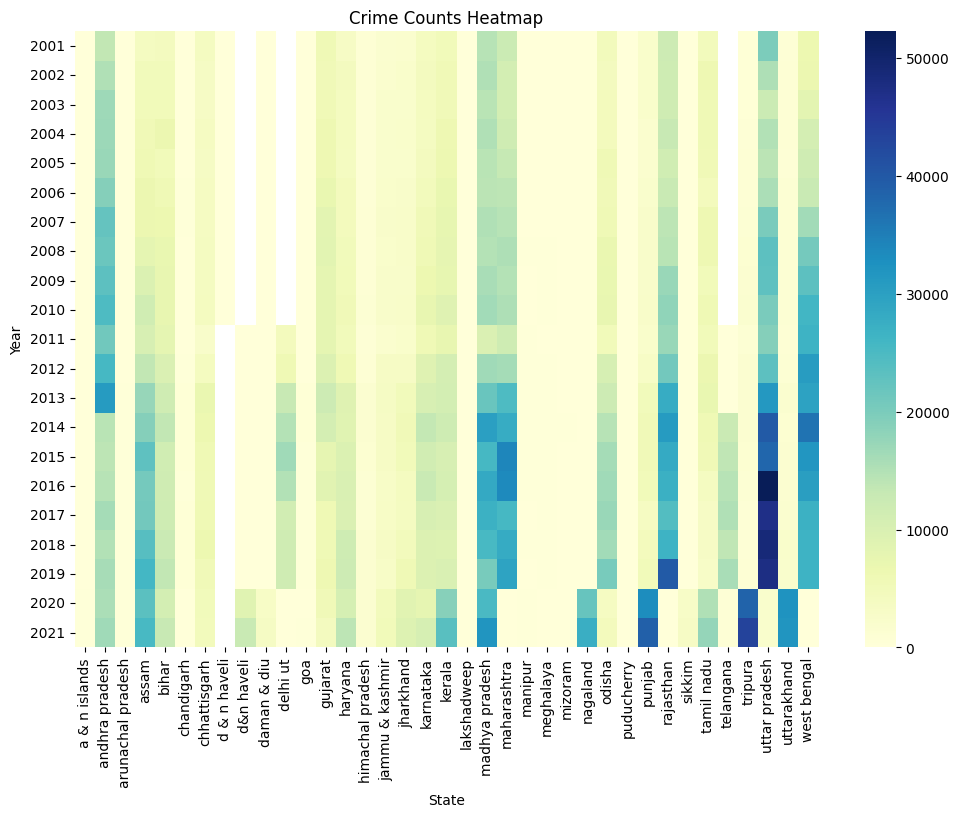

In [40]:
import seaborn as sns

heatmap_data = data.pivot(index='Year', columns='State', values='Total_crimes')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False)
plt.title('Crime Counts Heatmap')
plt.xlabel('State')
plt.ylabel('Year')
plt.show()